In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [2]:
start_year = 2014
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [3]:
close_price = code_dat.loc[:, 'Close']

In [4]:
n_days_sma = 30
n_days_atr = 15

In [5]:
rolling_sma = code_dat.rolling(window=n_days_sma)

In [6]:
sma = rolling_sma['Close'].mean()

In [7]:
previous = code_dat.shift(1)

In [8]:
current = code_dat

In [9]:
chcl = current.loc[:, 'High'] - current.loc[:, 'Low']
chcl.name = 'chcl'

In [10]:
chpc = (current.loc[:, 'High'] -  previous.loc[:, 'Close']).abs()
chpc.name = 'chpc'

In [11]:
clpc = (current.loc[:, 'Low'] - previous.loc[:, 'Close']).abs()
clpc.name = 'clpc'

In [12]:
summary = pd.concat([chcl, chpc, clpc], axis=1)

In [13]:
tr = summary.max(axis=1)

In [14]:
atr = tr.ewm(alpha=1/n_days_atr).mean()

In [15]:
up_band = sma + atr
down_band = sma - atr

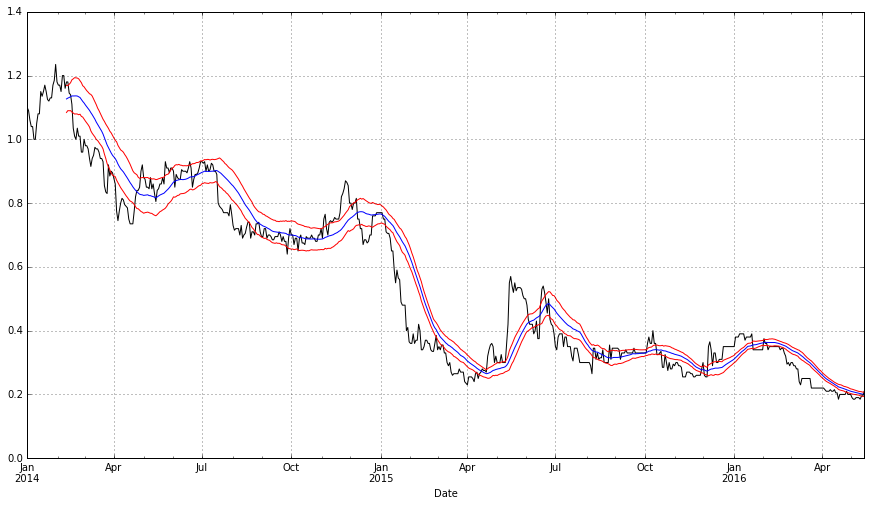

In [16]:
plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
close_price.plot(ax=ax, color='k')
sma.plot(ax=ax, color='b')
up_band.plot(ax=ax, color='r')
down_band.plot(ax=ax, color='r')
plt.grid()